# Work with transformations in a notebook



In [3]:
import copy
import datetime as dt
import importlib # needed so that we can reload packages
import ipywidgets as wdg
import matplotlib.pyplot as plt
import os, os.path
import numpy as np
import pandas as pd
import pathlib
import sys
import time
from typing import Union
import warnings
warnings.filterwarnings("ignore")

# add SISEPUEDE to path
dir_py = pathlib.Path(os.path.realpath(".")).parents[1]
if str(dir_py) not in sys.path:
    sys.path.append(str(dir_py))

    
##  IMPORT SISEPUEDE EXAMPLES AND TRANSFORMERS

from sisepuede.manager.sisepuede_examples import SISEPUEDEExamples
import sisepuede.core.support_classes as sc
import sisepuede.transformers as trf
import sisepuede.utilities._toolbox as sf


# Transformations: what are they?

Transformations are well-defined in the SISEPUEDE ecosystem. A ``Transformation`` is a parameterization of a``Transformer``. Both are classes in SISEPUEDE, with ``Transformations`` and ``Transformers`` acting as collections of these classes, respectively. Each ``Transformer`` class is a function that modifies trajectories to reflect policy outcomes; documentation for each of the 60+ functions is available on readthedocs. 

``Transformation`` objects allow users to define parameterizations of ``Transformer`` objects using configuration files in a directory. This directory contains a configuration for:

1. All transformations
1. General configuraiton and information on the baseline
1. The strategy definition file, which combines transformations



See sisepuede.readthedocs.io for more information on transformations, transformers, and strategies.



# Let's explore the objects that underly all transformations: ``Transformers``

In [4]:
?trf.Transformers

Init signature:
trf.Transformers(
    dict_config: Dict,
    code_baseline: str = 'TFR:BASE',
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    field_region: Optional[str] = None,
    logger: Optional[logging.Logger] = None,
    regex_code_structure: re.Pattern = re.compile('TFR:(\\D*):(.*$)'),
    regex_template_prepend: str = 'sisepuede_run',
    **kwargs,
)
Docstring:     
Build collection of Transformers that are used to define transformations.

Includes some information on

Initialization Arguments
------------------------
- dict_config: configuration dictionary used to pass parameters to 
    transformations. See ?TransformerEnergy._initialize_parameters() for
    more information on requirements.
- dir_jl: location of Julia directory containing Julia environment and 
    support modules
- fp_nemomod_reference_files: directory housing reference files called by
    NemoMod when running electricity model. Required to access data in 
    EnergyProduction. Needs the fol

##  Let's get available `Transformer` classes

- These are stored in the `Transformers` object
- `Transformers` requires an input data frame to transform; this data frame should be a set of raw SISEPUEDE inputs
    - Use `SISEPUEDEExamples()` to pull example data; examples are listed in `SISEPUEDEExamples.all_examples`

In [5]:
examples = SISEPUEDEExamples()
df_input = examples("input_data_frame")


##  We can build the `Transformers` class now

In [80]:
transformers = trf.Transformers(
    {},
    df_input = df_input,
)

# set some shortcuts
mat = transformers.model_attributes
time_periods = sc.TimePeriods(mat);

###  `Transformers` allows you to access all `Transformer` objects
- A `Transformer` is akin to a lever in the XLRM framework
- Each `Transformer` is associated with a variable (or set of variables) that represent a feasible, literature-based change in outcome due to at least one intervention(s)
- The list of available `Transformer` classes is available in `Transformers.all_transformers`
- Get a transformer using `Transformers.get_transformer`

In [16]:
transformers.all_transformers

['TFR:AGRC:DEC_CH4_RICE',
 'TFR:AGRC:DEC_EXPORTS',
 'TFR:AGRC:DEC_LOSSES_SUPPLY_CHAIN',
 'TFR:AGRC:INC_CONSERVATION_AGRICULTURE',
 'TFR:AGRC:INC_PRODUCTIVITY',
 'TFR:BASE',
 'TFR:CCSQ:INC_CAPTURE',
 'TFR:ENTC:DEC_LOSSES',
 'TFR:ENTC:LEAST_COST_SOLUTION',
 'TFR:ENTC:TARGET_CLEAN_HYDROGEN',
 'TFR:ENTC:TARGET_RENEWABLE_ELEC',
 'TFR:FGTV:DEC_LEAKS',
 'TFR:FGTV:INC_FLARE',
 'TFR:INEN:INC_EFFICIENCY_ENERGY',
 'TFR:INEN:INC_EFFICIENCY_PRODUCTION',
 'TFR:INEN:SHIFT_FUEL_HEAT',
 'TFR:IPPU:DEC_CLINKER',
 'TFR:IPPU:DEC_DEMAND',
 'TFR:IPPU:DEC_HFCS',
 'TFR:IPPU:DEC_N2O',
 'TFR:IPPU:DEC_OTHER_FCS',
 'TFR:IPPU:DEC_PFCS',
 'TFR:LNDU:DEC_DEFORESTATION',
 'TFR:LNDU:DEC_SOC_LOSS_PASTURES',
 'TFR:LNDU:INC_REFORESTATION',
 'TFR:LNDU:INC_SILVOPASTURE',
 'TFR:LNDU:PLUR',
 'TFR:LSMM:INC_CAPTURE_BIOGAS',
 'TFR:LSMM:INC_MANAGEMENT_CATTLE_PIGS',
 'TFR:LSMM:INC_MANAGEMENT_OTHER',
 'TFR:LSMM:INC_MANAGEMENT_POULTRY',
 'TFR:LVST:DEC_ENTERIC_FERMENTATION',
 'TFR:LVST:DEC_EXPORTS',
 'TFR:LVST:INC_PRODUCTIVITY',
 'TFR

###  A `Transformer` is callable
- When you get it, you can call it
- When called, it will generate a dataframe that is transformed under default parameters associated with each Transformer

In [19]:
tr_medium_duty = transformers.get_transformer("TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY")

# you can call it 
tr_medium_duty()

region  time_period  avgload_trns_freight_tonne_per_vehicle_aviation  \
0   costa_rica            0                                             70.0   
1   costa_rica            1                                             70.0   
2   costa_rica            2                                             70.0   
3   costa_rica            3                                             70.0   
4   costa_rica            4                                             70.0   
5   costa_rica            5                                             70.0   
6   costa_rica            6                                             70.0   
7   costa_rica            7                                             70.0   
8   costa_rica            8                                             70.0   
9   costa_rica            9                                             70.0   
10  costa_rica           10                                             70.0   
11  costa_rica           11                                             70.0   
12  costa_rica           12                                             70.0   
13  costa_rica           13                                             70.0   
14  costa_rica           14                                             70.0   
15  costa_rica           15                                             70.0   
16  costa_rica           16                                             70.0   
17  costa_rica           17                                             70.0   
18  costa_rica           18                                             70.0   
19  costa_rica           19                                             70.0   
20  costa_rica           20                                             70.0   
21  costa_rica           21                                             70.0   
22  costa_rica           22                                             70.0   
23  costa_rica           23                                             70.0   
24  costa_rica           24                                             70.0   
25  costa_rica           25                                             70.0   
26  costa_rica           26                                             70.0   
27  costa_rica           27                                             70.0   
28  costa_rica           28                                             70.0   
29  costa_rica           29                                             70.0   
30  costa_rica           30                                             70.0   
31  costa_rica           31                                             70.0   
32  costa_rica           32                                             70.0   
33  costa_rica           33                                             70.0   
34  costa_rica           34                                             70.0   
35  costa_rica           35                                             70.0   

    avgload_trns_freight_tonne_per_vehicle_rail_freight  \
0                                              2923.0     
1                                              2923.0     
2                                              2923.0     
3                                              2923.0     
4                                              2923.0     
5                                              2923.0     
6                                              4082.0     
7                                              4082.0     
8                                              4082.0     
9                                              4082.0     
10                                             4082.0     
11                                             4082.0     
12                                             4082.0     
13                                             4082.0     
14                                             4082.0     
15                                             4082.0     
16                                          

###  A `Transfomer` is parameterized using keyword arguments
- No need to pass `df_input` unless you want to apply it to a data frame not used to instantiation the `Transformers` collection
- However, other arguments can be varied
- Full documentation of all `Transformer` functions is available at the [SISEPUEDE readthedocs](https://sisepuede.readthedocs.io/en/latest/transformers.html)
- Let's look at the doc string of `tr_medium_duty.function`, the base function in the transformer that we called (can also use `?tr_medium_duty`, but it will not show the signature)
    - `categories` can be varied to any TRNS category
    - `dict_allocation_fuels_target` is used to allocate the magnitude of the fuel shift across target fuels; 
        - `dict_allocation_fuels_target = {"fuel_electricity": 1.0}` means that 100% of the magnitude will be shifted away from `fuels_source`to electricity
    - `fuels_source` give fuels that are shifted away from. By default, this `Transformer` only shifts away from diesel and gas
    - `magnitude`: fraction of source fuel mix that is shifted to fuels specified in `dict_allocation_fuels_target`
    - `vec_implementation_ramp`: the implementation ramp vector. See discussion below for more information on how this can be specified

In [22]:
?tr_medium_duty.function


Signature:
tr_medium_duty.function(
    categories: List[str] = ['road_heavy_freight', 'road_heavy_regional', 'public'],
    dict_allocation_fuels_target: Optional[dict] = None,
    df_input: Optional[pandas.core.frame.DataFrame] = None,
    fuels_source: List[str] = ['fuel_diesel', 'fuel_gasoline'],
    magnitude: float = 0.7,
    strat: Optional[int] = None,
    vec_implementation_ramp: Optional[numpy.ndarray] = None,
) -> pandas.core.frame.DataFrame
Docstring:
Implement the "Fuel-Switch Medium Duty" TRNS transformation on input 
    DataFrame df_input. By default, transfers mangitude to electricity 
    from gasoline and diesel; e.g., with magnitude = 0.7, then 70% of 
    diesel and gas demand are transfered to fuels in fuels_target. The 
    rest of the fuel demand is then transferred to hydrogen. 


Function Arguments
------------------

Keyword Arguments
-----------------
- catgories: TRNS categories to apply to. Defaults to 
    [
        "road_heavy_freight", 
        "road_he

# Now, let's examine `Transformation` classes

- A `Transformation` is a parameterization of a `Transformer`
- Let's look at fuel shifting medium-duty
- A `Transformation` can be defined using a dictionary or a configuration file. 
    - **NOTE**: A value of `None` can be passed in a YAML configuration using `null`


-----

#### For this example, we'll walk through a dictionary. 

The following keys are required in a dictionary/yaml file:

- `citations`: list of bibtex citations to call. These bibtex citations can be in the default SISEPUEDE library `sisepuede/docs/source/citations.bib` or provided in a Transformation definition directory in `citations.bib`
- `description`: optional description to provide. 
    - **NOTE**: Descriptions can be include citations as \\cite{CITEKEY}
- `identifiers` (**required**): 
    - `transformation_code` (**required**): specify a transformation code. These codes are used to define strategies. **NOTE: CANNOT CONTAIN "|" CHARACTER**
    - `transformation_name` (optional): optional name for the transformation, but it is recommended to provide one. This name is used in building automated reports and display tables.
- `parameters` (**required**): Parameters--or keyword arguments to the function--are passed as a dictionary associated with this key. 
    - Parameters included in here *must* be keyword arguments to the `Transformer` that will be parameterized
- `transformer` (**required**): The `Transformer` code that this transformation will parameterize. 
        

In [24]:
# Default setup
dict_setup = {
    "citations": ["xyz", "xbm"],
    "identifiers": {"transformation_code": "TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY",
    "transformation_name": "Shift fuel for medium duty vehicles"},
    "description": "blah blah blah",
    "parameters": {
        "categories": [
            "road_heavy_freight",
            "road_heavy_regional",
            "public"
        ],
        "dict_allocation_fuels_target": None,
        "fuels_source": [
            "fuel_diesel", 
            "fuel_gasoline"
        ],
        "magnitude": 0.3,
        "vec_implementation_ramp": {
            "alpha_logistic": 0,
            "n_tp_ramp": None,
            "tp_0_ramp": 5,
            "window_logistic": [-8, 8]
        }
    },
    "transformer": "TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY"
}


# built the Transformation using dict_setup
transformation_1 = trf.Transformation(
    dict_setup,
    transformers,
)

# Look at the transformed variables for one of the categories

The transformation shifts fuel sources for three categories--`road_heavy_freight`, `road_heavy_regional`, and `public`--into electricity and hydrogen. Let's look at fuel fractions under two conditions--without the tranformation + with the transformation.

<AxesSubplot: title={'center': 'Transformation 1 Data'}>

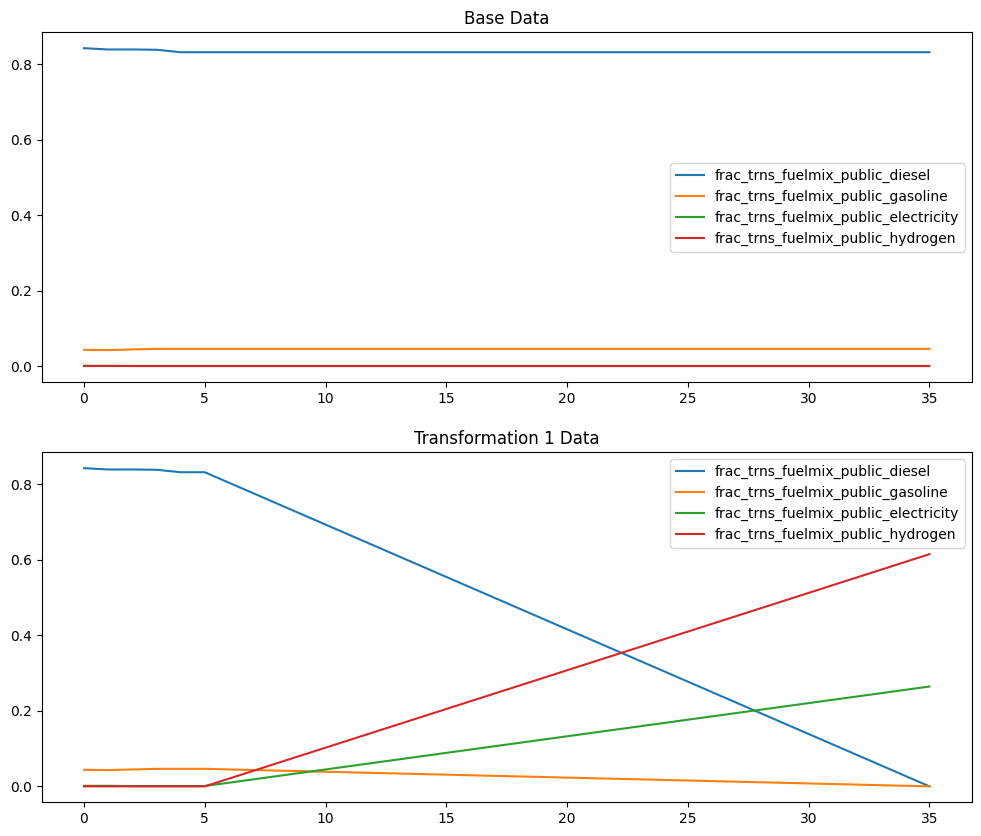

In [40]:
# First, let's build the fields
cats = ["public"]
fields = []

for fuel_name in ["Diesel", "Gasoline", "Electricity", "Hydrogen"]:
    fields += mat.build_variable_fields(
        f"Transportation Mode Fuel Fraction {fuel_name}",
        restrict_to_category_values = cats,
    )


# execute the transformation (can also use transformation_1.function())
df_input_transformation_1 = transformation_1()

# build a plot
fig, ax = plt.subplots(2, 1, figsize = (12, 10))

# base
ax[0].set_title("Base Data")
df_input[fields].plot(ax = ax[0])

# transformed
ax[1].set_title("Transformation 1 Data")
df_input_transformation_1[fields].plot(ax = ax[1])

## What if we want to change the timing or shape of implementation?

The `implementation_ramp` is commonly specified using `vec_implementation_ramp` across SISEPUEDE. 

- The implementation ramp represents what fraction of the magnitude of a transformation is implemented across time. It takes values in [0, 1] and must have the same length as the original data
- If not specified, it defaults to start at the current year + 2 and end at the final time period
- **IMPORTANT NOTE**: When building Transformation directories, you can specify a default `vec_implementation_ramp` in the general config (under the `general` key); one for the baseline (under the `baseline` key in config_general); and, if desired, a unique one for any of the Transformations in the directory. In these configuration files--as with setup dictionaries--`vec_implementation` can be specified as a dictionary or a vector of values.

----


###  Approach 1: set the implementation ramp using a dictionary (preferred)
 

Let's demonstrate one approach to setting the implementation ramp. First, we can build one using parameters in a dictionary. The key parameters are:

- `alpha` (mix fraction): fraction of the ramp that is logistic. For all linear, set to 0.0; for completely logistic, set to 1.0
- `tp_0_ramp`: final time period == 0 in the ramp
- `window_logistic`: $(w_0, w_1)$ the window of the standard logit function [ $f(x) = (1 + e^{-x})^{-1}$ ] used to create shape. In general, the min and max should be symmetric:
     - if $|w_0| < |w_1|$ and $w_0 < 0, w_1 > 0$, then the ramp will grow quickly and reach near-full implementation early; 
     - if $|w_0| > |w_1|$ and $w_0 < 0, w_1 > 0$, then the ramp will grow slowly and reach near-full implementation late; 
- `d` (not in interactive): value where logit == 0.5. For advanced use.

```
{
    "vec_implementation_ramp": {
        "alpha_logistic": alpha,
        "n_tp_ramp": len(time_periods.all_time_periods),
        "tp_0_ramp": tp_0_ramp,
        "window_logistic": (window_min, window_max)
    }
}
```

----

##  Now, we can interact with a widget to explore how these shape parameters change the implementation ramp


In [125]:
def interactive_df_plot(
    df: pd.DataFrame,
    fields_plot: list,
) -> wdg.interactive:
    """
    Build an interactive ipywidget time seris plot for df. Will ignore fields specified
        in `fields_ignore`.
    """
    
    # build some widgets
    slider_alpha = wdg.FloatSlider(
        description = "$\\alpha$",
        min = 0.0, 
        max = 1.0, 
        step = 0.01,
        value = 0.0,
    )
    slider_tp_0 = wdg.IntSlider(
        description = "$t_0^{(ramp)}$",
        min = min(time_periods.all_time_periods), 
        max = max(time_periods.all_time_periods),
        value = (dt.datetime.now().year + 2 - time_periods.all_years[0]) # default
    )
    slider_window_max = wdg.FloatSlider(
        description = "$w_{max}$",
        max = 10.0,
        min = 0.0, 
        value = 8.0,
    )
    slider_window_min = wdg.FloatSlider(
        description = "$w_{min}$",
        max = 0.0,
        min = -10.0, 
        value = -8.0,
    )
        

    # placeholder for other actions
    df_plot = df

    # function to allow interaction
    def show_transformation(
        alpha: float,
        tp_0_ramp: int,
        window_max: float,
        window_min: float,
    ) -> 'plt.plot()':
        """
        Plot output fields from the model run on the df_model_data data frame
        """
        

        # update
        dict_setup_cur = copy.deepcopy(dict_setup)
        (
            dict_setup_cur
            .get("parameters")
            .update(
                {
                    "vec_implementation_ramp": {
                        "alpha_logistic": alpha,
                        "n_tp_ramp": len(time_periods.all_time_periods),
                        "tp_0_ramp": tp_0_ramp,
                        "window_logistic": (window_min, window_max)
                    }
                }
            )
        )


        # build a new transformation with the implementation ramp
        transformation_cur = trf.Transformation(
            dict_setup_cur,
            transformers,
        )

        # execute the transformation and plot (can also use transformation_1.function())
        df_input_transformation_cur = transformation_cur()
        
        # initialize plot
        fig, ax = plt.subplots(1, 1, figsize = (12, 6))
        ax.set_title("Transformation with modified vec_implementation_ramp")
        df_input_transformation_cur[fields_plot].plot(ax = ax, )
        
        plt.show()

        return None
    
    

    out = wdg.interactive(
        show_transformation,
        alpha = slider_alpha,
        tp_0_ramp = slider_tp_0,
        window_max = slider_window_max,
        window_min = slider_window_min,
    )

    return out


interactive_df_plot(
    df_input,
    fields,
)

interactive(children=(FloatSlider(value=0.0, description='$\\alpha$', max=1.0, step=0.01), IntSlider(value=11,…

###  We can read more about the parameters in the `_toolbox` function `ramp_vector`

In [118]:
# check the characteristics of ramp vector
?sf.ramp_vector

Signature:
sf.ramp_vector(
    n: int,
    alpha_logistic: float = 0.0,
    d: Union[float, int] = 0,
    r_0: int = 0,
    r_1: Optional[int] = None,
    window_logistic: Tuple[int, int] = (-8, 8),
) -> float
Docstring:
Build a ramp vector for n time periods. Allows for the specifcation of a 
    linear vector, sigmoid, window within sigmoid, or some mix of the two.
    

Function Arguments
------------------
- n: number of time periods (total)

Keyword Arguments
-----------------
- alpha_logistic: fraction of ramp function that is associated with the 
    logistic. (1 - alpha_logistic) gives the fraction that is linear.
- d: centroid for logistic function in window
- r_0: last period == 0; e.g., if r_0 = 4 and n = 10, then in a linear 
    function, we have
- r_1: first period == 1. If None, defaults to n
- window_logistic: window in standard logistic function (i.e., 
    1/(1 + e^(-x)) that is shifted and stretched to create the sigmoid 
    component. By default, use -8 to 8.
    *

In [ ]:
# set the vector--should be a numpy array
vec_implementation_ramp = {
    
}

# build a new transformation with the implementation ramp
transformation_2 = trf.Transformation(
    dict_setup_2,
    transformers,
)

# execute the transformation (can also use transformation_1.function())
df_input_transformation_2 = transformation_2()

fig, ax = plt.subplots(2, 1, figsize = (12, 10))

# base
ax[0].set_title("Base Data")
df_input[fields].plot(ax = ax[0])

# transformed
ax[1].set_title("Transformation 2 Data")
df_input_transformation_2[fields].plot(ax = ax[1])

###  Approach 2: directly set the implementation ramp

Let's demonstrate one approach to setting the implementation ramp. First, we can build one from scratch. It must take values in [0, 1], start with 0, and end with 1. The time periods in the example range from 0-35 (2015 to 2050); let's suppose we have a transformation that begins in 2030 (the last value == 0 in this case) with 80% implemenation by 2040 and 100% by 2050. 

``vec_implementation_ramp = np.concatenate([np.zeros(16), np.arange(1, 11)*0.08, np.arange(1, 11)*0.02 + 0.8])``

**NOTE**: the toolbox (`sisepuede.utilities._toolbox`) includes the `ramp_vector` function, which is extremely useful for building vectors from scratch.

<AxesSubplot: title={'center': 'Transformation 2 Data'}>

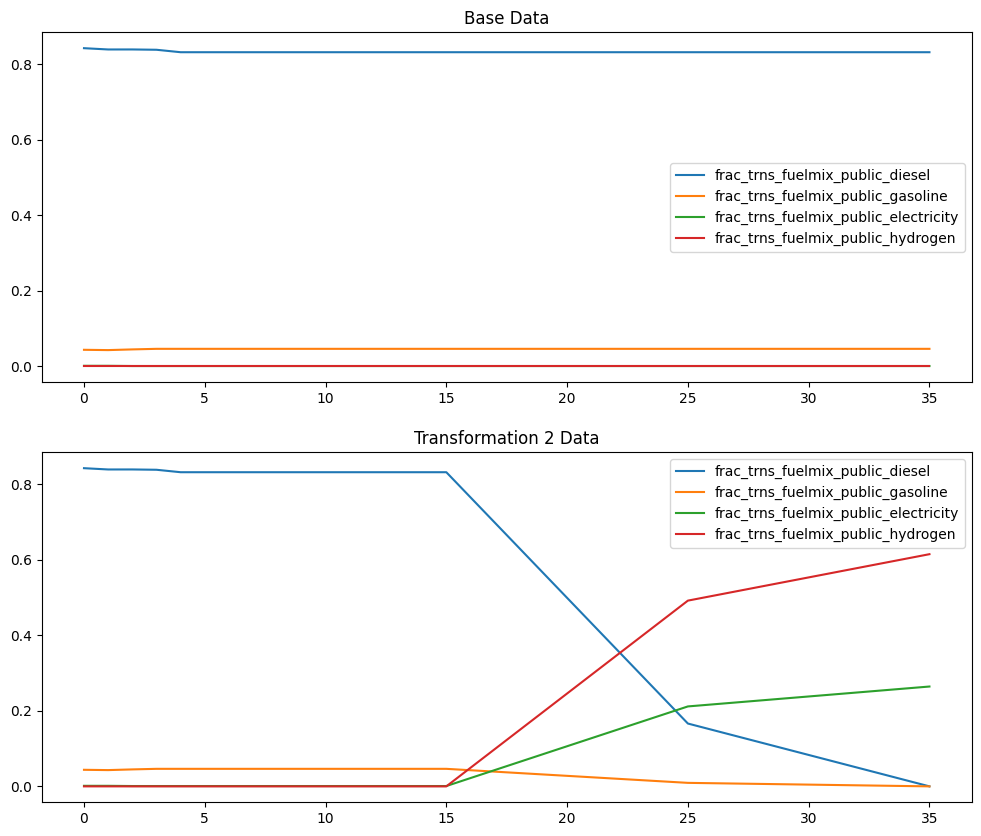

In [61]:
# set the vector--should be a numpy array
vec_implementation_ramp = np.concatenate(
    [
        np.zeros(16),
        np.arange(1, 11)*0.08,
        np.arange(1, 11)*0.02 + 0.8
    ]
)

# update
dict_setup_2 = copy.deepcopy(dict_setup)
dict_setup_2.get("parameters").update({"vec_implementation_ramp": vec_implementation_ramp})



# build a new transformation with the implementation ramp
transformation_2 = trf.Transformation(
    dict_setup_2,
    transformers,
)

# execute the transformation (can also use transformation_1.function())
df_input_transformation_2 = transformation_2()

fig, ax = plt.subplots(2, 1, figsize = (12, 10))

# base
ax[0].set_title("Base Data")
df_input[fields].plot(ax = ax[0])

# transformed
ax[1].set_title("Transformation 2 Data")
df_input_transformation_2[fields].plot(ax = ax[1])

<AxesSubplot: >

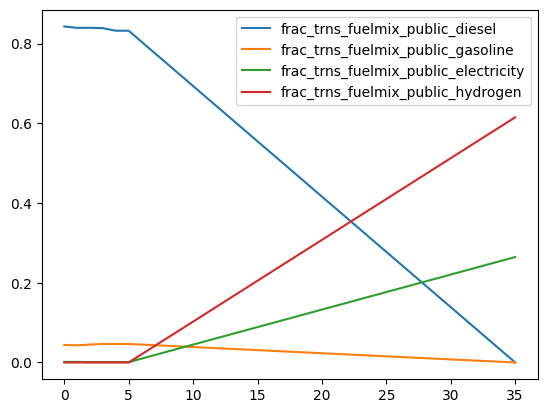

In [10]:
mat = transformers.model_attributes

transformation_2 = trf.Transformation(
    "/Users/jsyme/Desktop/trf_testing/transformation_trname_here.yaml",
    transformers,
)

#transformation.dict_parameters
df_tmp = transformation.function()
df_tmp[fields].plot()

In [12]:
transformation.config.dict_yaml

{'citations': ['xyz', 'xbm'],
 'identifiers': {'transformation_code': 'TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY',
  'transformation_name': 'Shift fuel for medium duty vehicles'},
 'description': 'blah blah blah',
 'parameters': {'categories': ['road_heavy_freight',
   'road_heavy_regional',
   'public'],
  'dict_allocation_fuels_target': None,
  'fuels_source': ['fuel_diesel', 'fuel_gasoline'],
  'magnitude': 0.3,
  'vec_implementation_ramp': {'alpha_logistic': 0,
   'n_tp_ramp': None,
   'tp_0_ramp': 5,
   'window_logistic': [-8, 8]}},
 'transformer': 'TFR:TRNS:SHIFT_FUEL_MEDIUM_DUTY'}

# We can then load transformations here

In [ ]:


transformations = trn.Transformations(
    "/Users/jsyme/Desktop/trf_testing/",
    transformers = transformers,
)
transformations.attribute_transformation




In [ ]:
# explore transformations
trb = transformations.get_transformation("TX:BASE")


# Next, let's build some individual strategies

In [ ]:



strat = st.Strategy(
    0,
    None,
    transformations,
)


strat1 = st.Strategy(
    1,
    "TX:LSMM:MANAGE_CATTLE_MANURE|TX:TRNS:SHIFT_FUEL_MEDIUM_DUTY",
    transformations,
)



In [ ]:

t0 = time.time()
strats = st.Strategies(
    transformations,
    export_path = pathlib.Path("/Users/jsyme/Desktop/tr_test_templates"),#"transformations",
    prebuild = True,
)
t1 = time.time()

##  Initialize the SISEPUEDE class to get data from existing templates
- see ``?SISEPUEDE`` for more information on initialization arguments
- You can initialize as a dummy to avoid marginal setup time for Julia, but we may want to run with it at some point

In [3]:
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = False, # no connection to Julia is initialized if set to True
    #n_futures = 100,
    regions = ["peru"],
    try_exogenous_xl_types_in_variable_specification = True,
)

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-05-20 12:02:29,595 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-05-20 12:02:29,598 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-05-20 12:02:29,599 - INFO - 	Setting export engine to 'sqlite'.
2024-05-20 12:02:29,624 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-05-20 12:02:29,625 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-05-20 12:02:29,626 - WARNING - No index fields found in ATTRIBUTE_DESIGN. Initializing index fields.
2024-05-20 12:02:29,627 - INFO - Successfully instantiated table ATTRIBUTE_DESIGN
2024-05-20 12:02:29,629 - WARNING - No index fields found in ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES. Initializing index fields.
2024-05-20 12:02:29,630 - INFO - Successfully instantiated table ATTRIBUTE_LHC_SAMPLES_EXOGENOUS_UNCERTAINTIES
2024-05-20 12:02:29,632 - WARNING - No index